# Data Wrangling & Cleaning

In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', 24)

### Load & Merge the data

In [2]:
movies = pd.read_csv('data/movies_metadata.csv')
cast = pd.read_csv('data/credits.csv')
keywords = pd.read_csv('data/keywords.csv')

C:\Users\Anastasia\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Summarizing your data for inspection

In [3]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.95,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.00,81.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.70,5415.00
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.02,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.00,104.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.90,2413.00
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.71,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.00,101.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.50,92.00
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.86,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.00,127.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.10,34.00
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.39,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.00,106.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.70,173.00


In [4]:
print('Movies Info')
print(movies.columns)
print(movies.describe())
print(movies.dtypes)

Movies Info
Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')
            revenue  runtime  vote_average  vote_count
count      45460.00 45203.00      45460.00    45460.00
mean    11209348.54    94.13          5.62      109.90
std     64332246.74    38.41          1.92      491.31
min            0.00     0.00          0.00        0.00
25%            0.00    85.00          5.00        3.00
50%            0.00    95.00          6.00       10.00
75%            0.00   107.00          6.80       34.00
max   2787965087.00  1256.00         10.00    14075.00
adult                     object
belongs_to_collection     object
budget                  

In [5]:
cast.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [6]:
print('Cast')
print(cast.columns)
print(cast.describe())

Cast
Index(['cast', 'crew', 'id'], dtype='object')
             id
count  45476.00
mean  108346.00
std   112443.80
min        2.00
25%    26443.25
50%    60002.50
75%   157302.00
max   469172.00


In [7]:
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [8]:
print('Keywords')
print(keywords.columns)
print(keywords.describe())

Keywords
Index(['id', 'keywords'], dtype='object')
             id
count  46419.00
mean  109769.95
std   113045.78
min        2.00
25%    26810.50
50%    61198.00
75%   159908.50
max   469172.00


### Fixing columns and types

In [9]:
#Choosing the columns we will need for our analysis
movies = movies.loc[:,['id','title', 'budget', 'revenue', 'release_date', 'status', 'popularity', 'vote_average', 'genres', 'production_companies']]
print(movies.dtypes)

id                       object
title                    object
budget                   object
revenue                 float64
release_date             object
status                   object
popularity               object
vote_average            float64
genres                   object
production_companies     object
dtype: object


In [10]:
movies.head()

,id,title,budget,revenue,release_date,status,popularity,vote_average,genres,production_companies
0,862,Toy Story,30000000,373554033.00,1995-10-30,Released,21.95,7.70,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'name': 'Pixar Animation Studios', 'id': 3}]"
1,8844,Jumanji,65000000,262797249.00,1995-12-15,Released,17.02,6.90,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'TriStar Pictures', 'id': 559}, {'na..."
2,15602,Grumpier Old Men,0,0.00,1995-12-22,Released,11.71,6.50,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'name': 'Warner Bros.', 'id': 6194}, {'name'..."
3,31357,Waiting to Exhale,16000000,81452156.00,1995-12-22,Released,3.86,6.10,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",[{'name': 'Twentieth Century Fox Film Corporat...
4,11862,Father of the Bride Part II,0,76578911.00,1995-02-10,Released,8.39,5.70,"[{'id': 35, 'name': 'Comedy'}]","[{'name': 'Sandollar Productions', 'id': 5842}..."


In [11]:
#reassigning the numeric types
def to_integer(col):
    delete_indexes = []
    for i, item in enumerate(col):
        try:
            item.strip()
            item = int(item) 
        except:
            print('\nTrying to change the type to integer of: ', item, ', index: ', movies.index[i])
            print('\nDeleting this row: \n', movies.iloc[i])
            delete_indexes.append(i)
    return delete_indexes
    
    
#id:
print('Adjusting the type of ID:')
del_indexes = to_integer(movies['id'])
movies.drop(del_indexes, inplace=True)
movies['id'] = movies['id'].astype(int)
print('\n')
print('Deleted ', len(del_indexes), ' rows.\n')
print('Type of id: ', movies['id'].dtype)

#budget:
print('Adjusting the type of BUDGET:')
del_indexes = to_integer(movies['budget'])
movies.drop(del_indexes, inplace=True)
movies['budget'] = movies['budget'].astype(int)
print('\nDeleted ', len(del_indexes), ' rows.')
print('\nType of budget: ', movies['budget'].dtype)

#popularity:
movies['popularity'] = movies['popularity'].astype(float)
print('Type of popularity: ', movies['popularity'].dtype)

Adjusting the type of ID:

Trying to change the type to integer of:  1997-08-20 , index:  19730

Deleting this row: 
 id                                                             1997-08-20
title                                                                 NaN
budget                                   /ff9qCepilowshEtG2GYWwzt2bs4.jpg
revenue                                                               NaN
release_date                                                            1
status                                                                NaN
popularity                                                            NaN
vote_average                                                          NaN
genres                  [{'name': 'Carousel Productions', 'id': 11176}...
production_companies                                                False
Name: 19730, dtype: object

Trying to change the type to integer of:  2012-09-29 , index:  29503

Deleting this row: 
 id                     

In [12]:
#checking for the NAN
print('Number of NAN per feature: \n', movies.isnull().sum())

#deleting rows containing NAN
del_index = movies[movies.isnull().any(axis=1)].index
movies.drop(del_index, inplace=True)
print('\nNAN deleted: \n', movies.isnull().sum())

Number of NAN per feature: 
 id                       0
title                    3
budget                   0
revenue                  3
release_date            87
status                  84
popularity               3
vote_average             3
genres                   0
production_companies     3
dtype: int64

NAN deleted: 
 id                      0
title                   0
budget                  0
revenue                 0
release_date            0
status                  0
popularity              0
vote_average            0
genres                  0
production_companies    0
dtype: int64


In [13]:
#Taking out the movies with 0 budget
del_index = movies[movies['budget'] == 0].index
movies_zero = movies[movies['budget'] == 0] #saved a copy of a 0 budget movies
movies.drop(del_index, inplace=True)
print('\nRemoved ', len(del_index), 'movies with 0 budget')


#Taking out the movies with 0 revenue
print(' ')
del_index = movies[movies['revenue'] == 0].index
movies_zero = movies[movies['revenue'] == 0]
movies.drop(del_index, inplace=True)
print('\nRemoved ', len(del_index), 'movies with 0 revenue')


Removed  36413 movies with 0 budget
 

Removed  3502 movies with 0 revenue


In [14]:
#Keeping only released movies
print('\nMovie status options: ', movies['status'].unique())
del_index = movies[movies['status'] != 'Released'].index
movies.drop(del_index, inplace=True)
print('\nMovie status options after removing all but Released: ', movies['status'].unique())

#Removing status feature
del(movies['status'])


Movie status options:  ['Released' 'Rumored' 'Post Production']

Movie status options after removing all but Released:  ['Released']


In [15]:
#Checking the date
movies['release_date'] = pd.to_datetime(movies['release_date'])
print('Type of release date: \n', movies['release_date'].dtype)

Type of release date: 
 datetime64[ns]


In [17]:
print('Checking feature types: \n', movies.dtypes)
print(movies.describe())

Checking feature types: 
 id                               int32
title                           object
budget                           int32
revenue                        float64
release_date            datetime64[ns]
popularity                     float64
vote_average                   float64
genres                          object
production_companies            object
dtype: object
             id       budget       revenue  popularity  vote_average
count   5377.00      5377.00       5377.00     5377.00       5377.00
mean   60657.21  31115716.22   90381594.51        9.78          6.27
std    95644.69  40170201.71  166187630.08       13.82          0.93
min        5.00         1.00          1.00        0.00          0.00
25%     8814.00   5115000.00    7022209.00        5.45          5.70
50%    14375.00  17000000.00   29950000.00        8.39          6.30
75%    59968.00  40000000.00  100000000.00       11.72          6.90
max   443319.00 380000000.00 2787965087.00      547.49   

In [20]:
movies

,id,title,budget,revenue,release_date,popularity,vote_average,genres,production_companies
0,862,Toy Story,30000000,373554033.00,1995-10-30,21.95,7.70,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'name': 'Pixar Animation Studios', 'id': 3}]"
1,8844,Jumanji,65000000,262797249.00,1995-12-15,17.02,6.90,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'TriStar Pictures', 'id': 559}, {'na..."
3,31357,Waiting to Exhale,16000000,81452156.00,1995-12-22,3.86,6.10,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",[{'name': 'Twentieth Century Fox Film Corporat...
5,949,Heat,60000000,187436818.00,1995-12-15,17.92,7.70,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'name': 'Regency Enterprises', 'id': 508}, {..."
8,9091,Sudden Death,35000000,64350171.00,1995-12-22,5.23,5.50,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Universal Pictures', 'id': 33}, {'n..."
9,710,GoldenEye,58000000,352194034.00,1995-11-16,14.69,6.60,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...","[{'name': 'United Artists', 'id': 60}, {'name'..."
10,9087,The American President,62000000,107879496.00,1995-11-17,6.32,6.50,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'name': 'Columbia Pictures', 'id': 5}, {'nam..."
13,10858,Nixon,44000000,13681765.00,1995-12-22,5.09,7.10,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...","[{'name': 'Hollywood Pictures', 'id': 915}, {'..."
14,1408,Cutthroat Island,98000000,10017322.00,1995-12-22,7.28,5.70,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Le Studio Canal+', 'id': 183}, {'na..."
15,524,Casino,52000000,116112375.00,1995-11-22,10.14,7.80,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...","[{'name': 'Universal Pictures', 'id': 33}, {'n..."


(array([2.880e+03, 1.094e+03, 5.090e+02, 3.330e+02, 1.830e+02, 9.700e+01,
        7.500e+01, 8.400e+01, 3.300e+01, 3.100e+01, 2.800e+01, 7.000e+00,
        4.000e+00, 1.500e+01, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.00000000e+00, 1.90000009e+07, 3.80000009e+07, 5.70000008e+07,
        7.60000008e+07, 9.50000008e+07, 1.14000001e+08, 1.33000001e+08,
        1.52000001e+08, 1.71000001e+08, 1.90000000e+08, 2.09000000e+08,
        2.28000000e+08, 2.47000000e+08, 2.66000000e+08, 2.85000000e+08,
        3.04000000e+08, 3.23000000e+08, 3.42000000e+08, 3.61000000e+08,
        3.80000000e+08]),
 <a list of 20 Patch objects>)

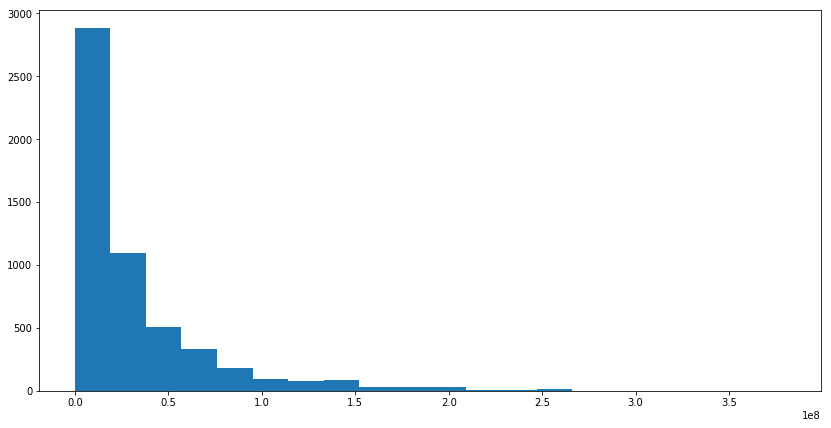

In [21]:
plt.figure(figsize=(14,7))
plt.hist(movies['budget'], bins=20)

In [ ]:
#Removing the outliers
# we remove all the data with the budget > then mean+3*std

mean_n_bed = np.mean(movies['budget'])
std_n_bed = np.std(movies['budget'])

#movies new =  budgets > mean+3*std



